##### CALLING MAIN TO TEST

Using cache found in /home/elenc2/.cache/torch/hub/facebookresearch_dinov2_main
/home/elenc2/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/swiglu_ffn.py:51: UserWarning: xFormers is not available (SwiGLU)
  warnings.warn("xFormers is not available (SwiGLU)")
/home/elenc2/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/attention.py:33: UserWarning: xFormers is not available (Attention)
  warnings.warn("xFormers is not available (Attention)")
/home/elenc2/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/block.py:40: UserWarning: xFormers is not available (Block)
  warnings.warn("xFormers is not available (Block)")


Loaded 352 part classifiers with l1 penalty
Loaded 352 part classifiers with l2 penalty
Image saved to output2/masks_airplanes--attack-airplanes--attack-1.jpg.png


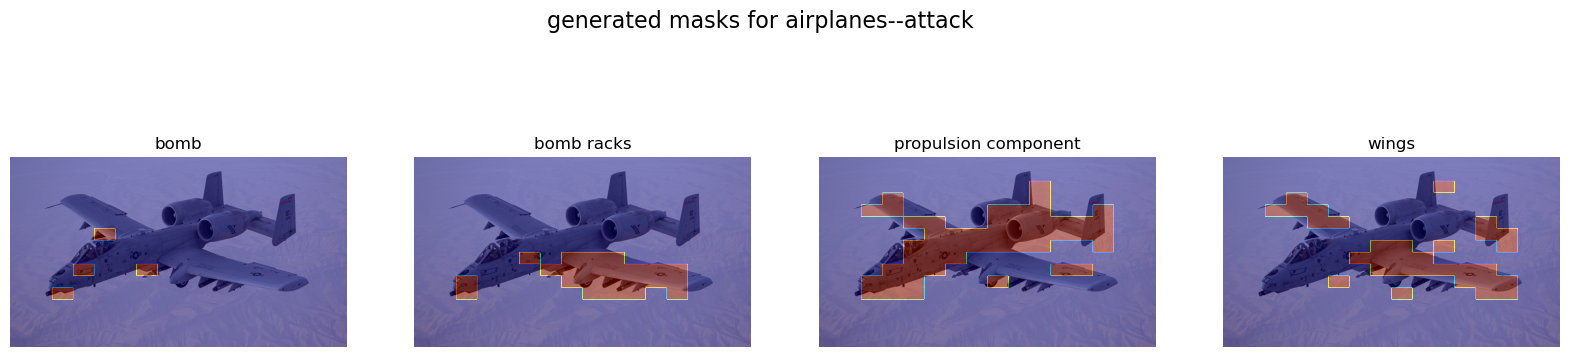

Image saved to output2/masks_kitchen--air fryer-kitchen--air fryer-1.jpg.png


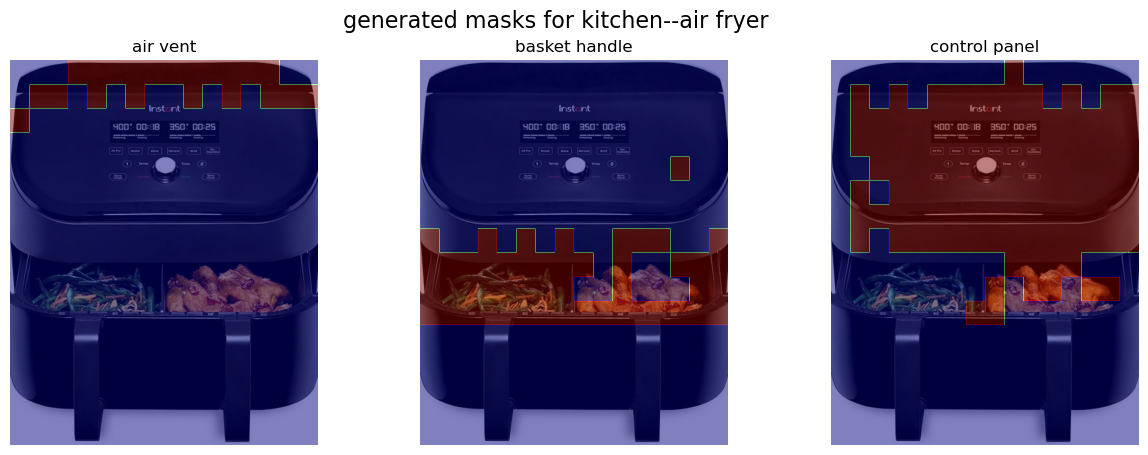

Image saved to output2/masks_kitchen--bottle opener-kitchen--bottle opener-1.jpg.png


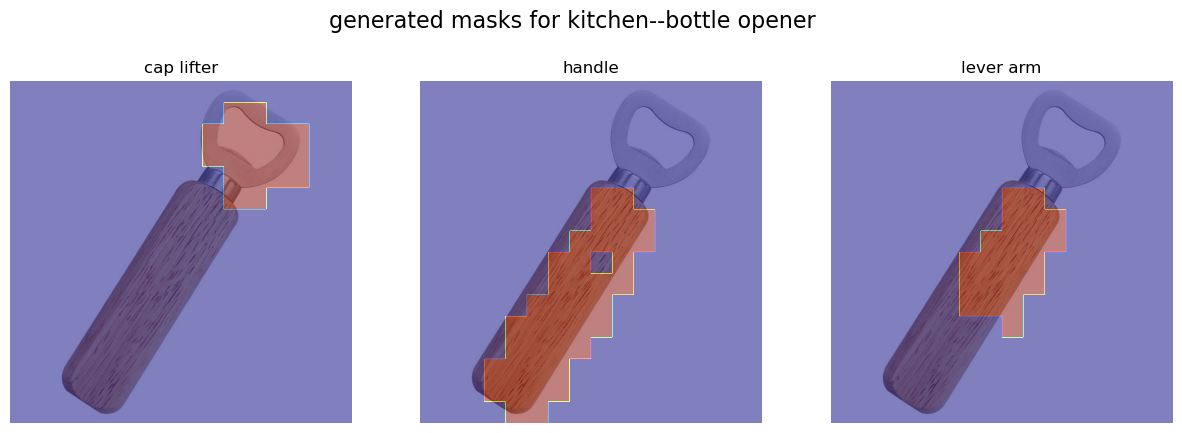

Image saved to output2/masks_kitchen--espresso machine-kitchen--espresso machine-2.jpg.png


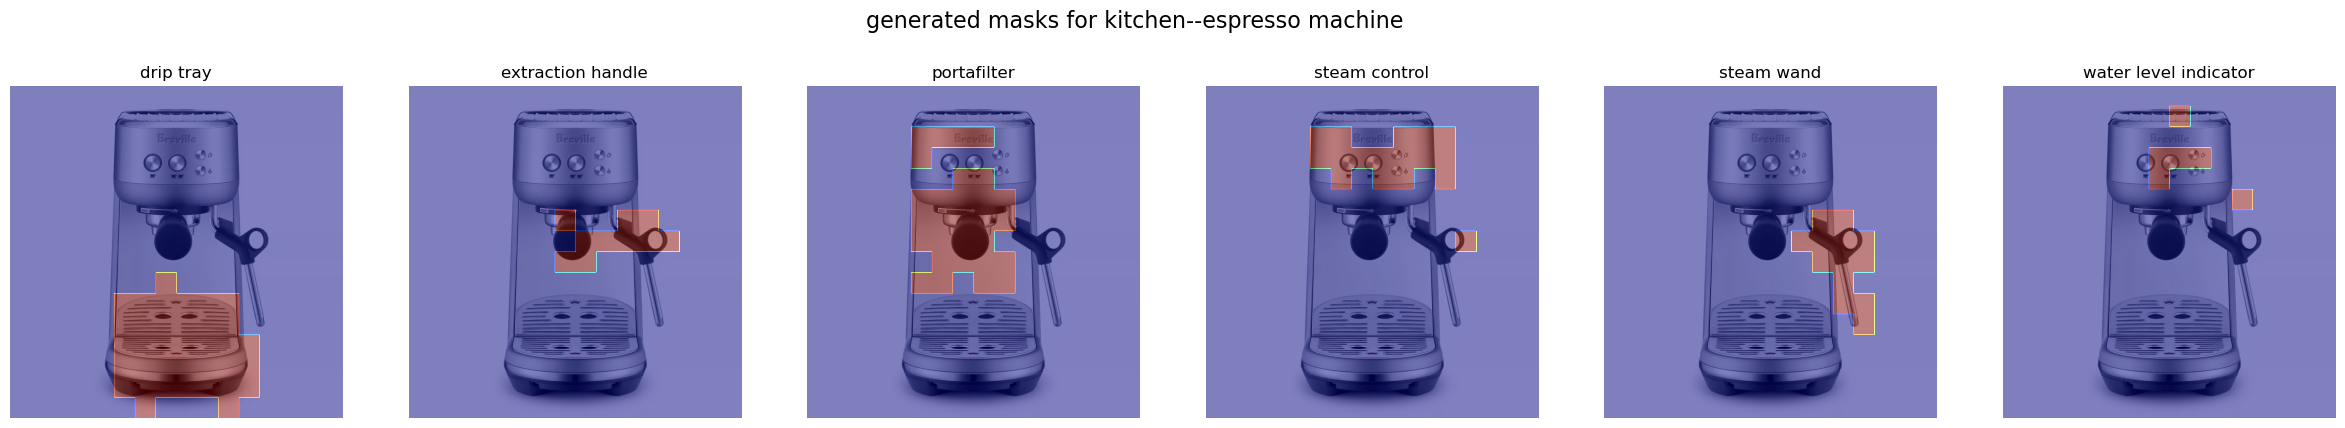

Image saved to output2/masks_vehicles--hatch back-vehicles--hatch back-2.jpg.png


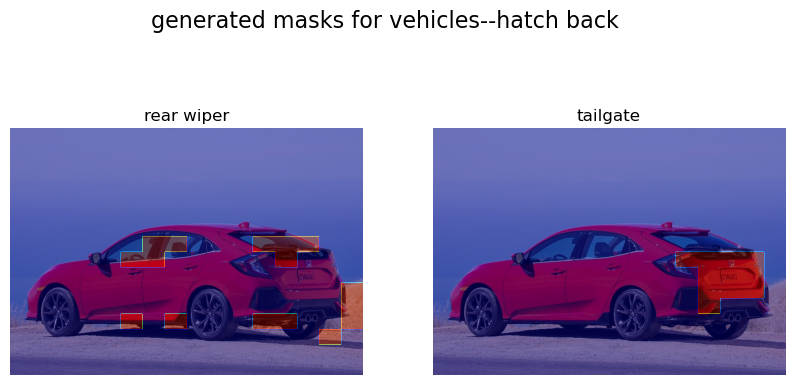

Image saved to output2/masks_kitchen--pizza cutter-kitchen--pizza cutter-1.jpg.png


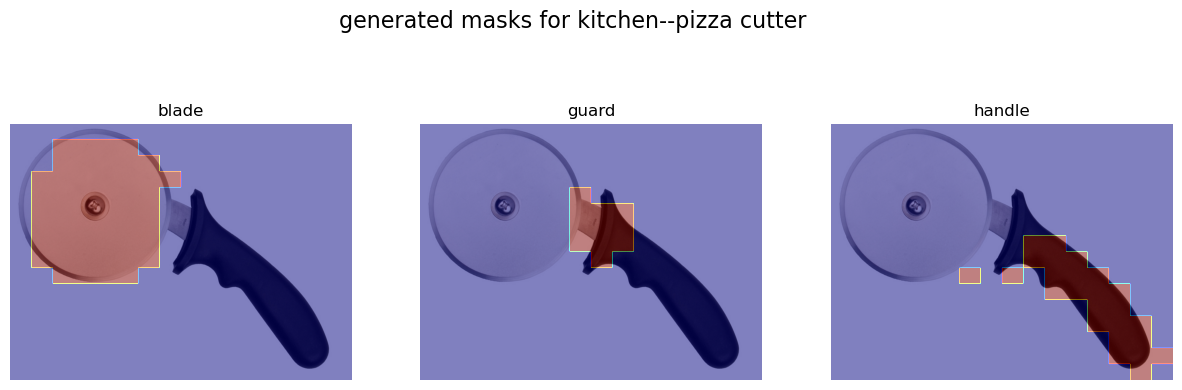

Image saved to output2/masks_vehicles--hatch back-vehicles--hatch back-1.jpg.png


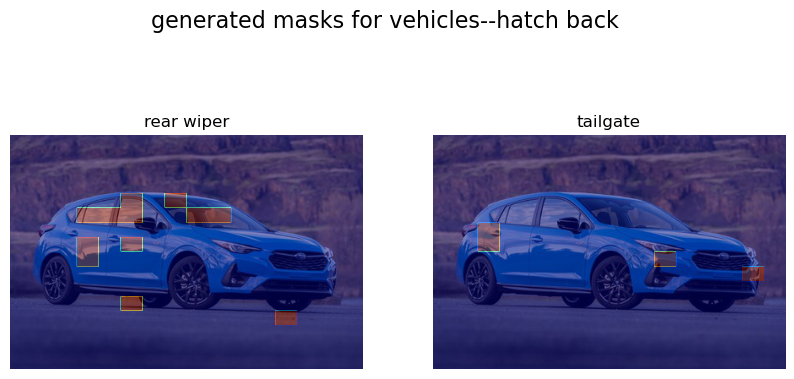

Image saved to output2/masks_airplanes--agricultural-airplanes--agricultural-1.png.png


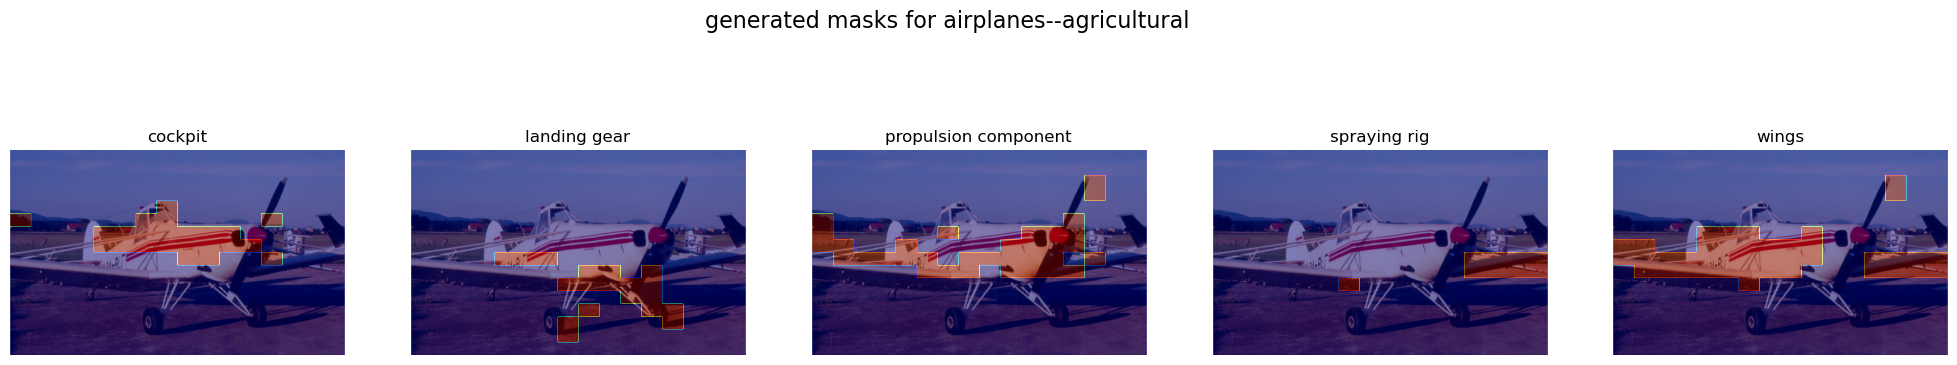

Image saved to output2/masks_kitchen--espresso machine-kitchen--espresso machine-3.png.png


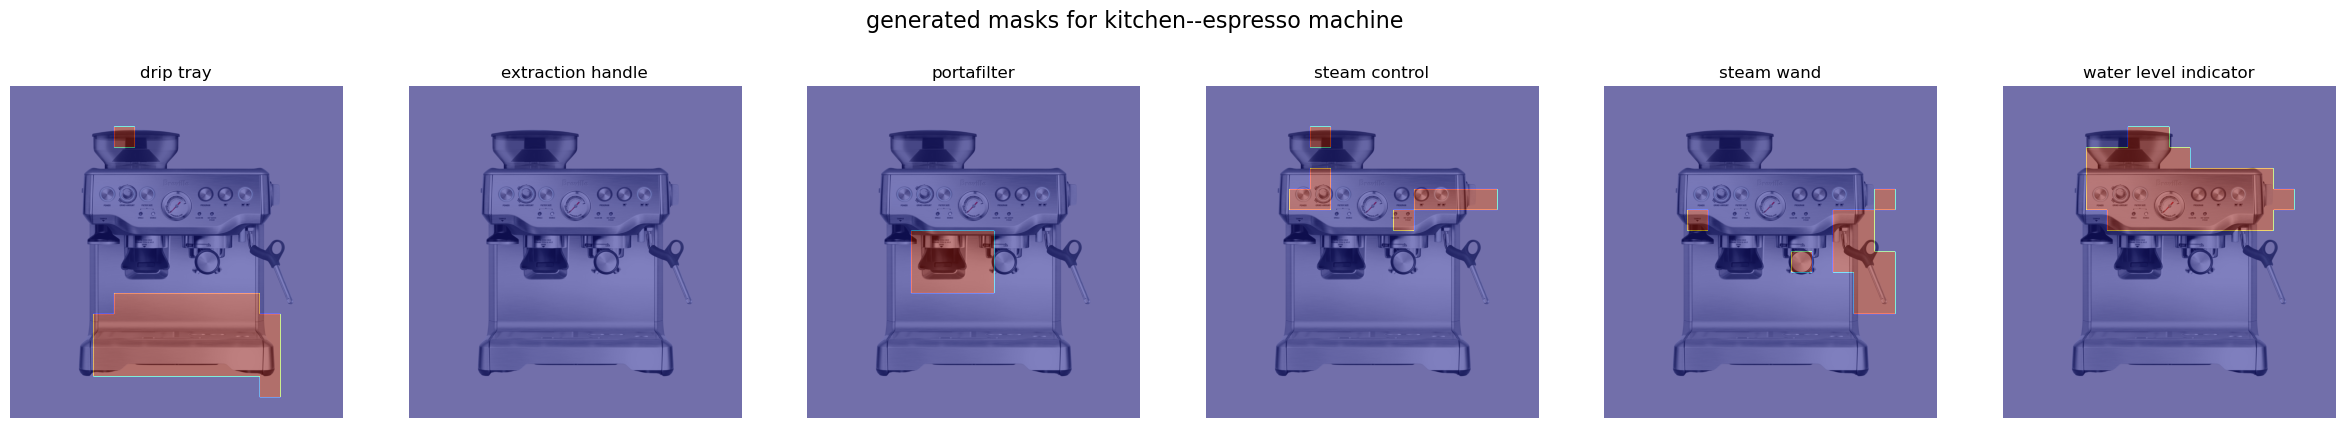

Image saved to output2/masks_kitchen--air fryer-kitchen--air fryer-2.jpg.png


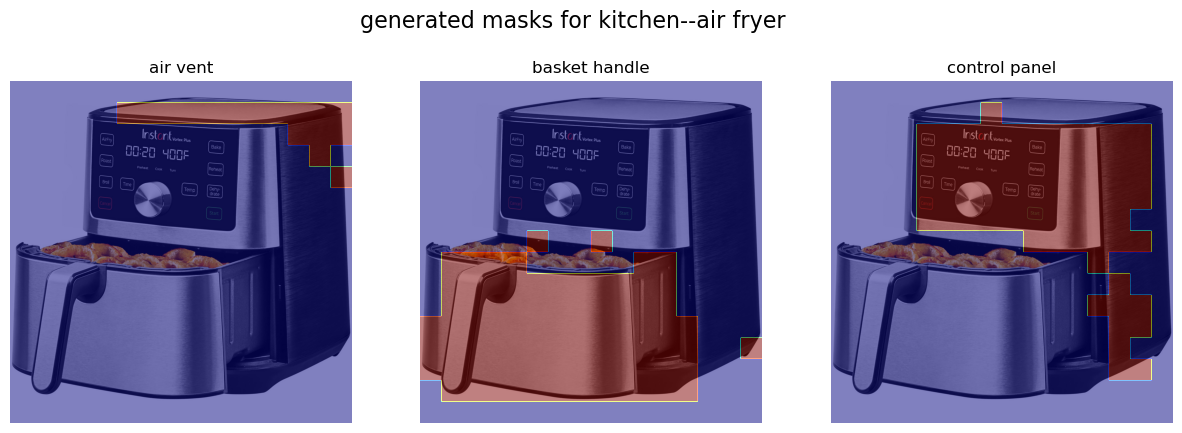

Image saved to output2/masks_airplanes--agricultural-airplanes--agricultural-3.jpg.png


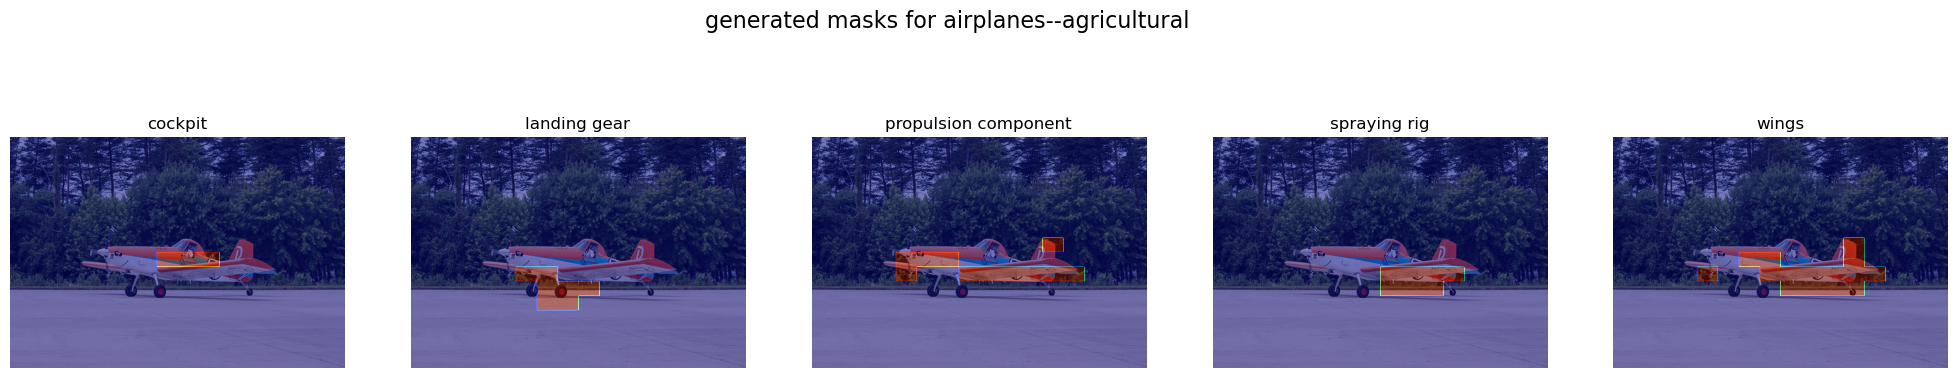

Image saved to output2/masks_airplanes--agricultural-airplanes--agricultural-4.jpg.png


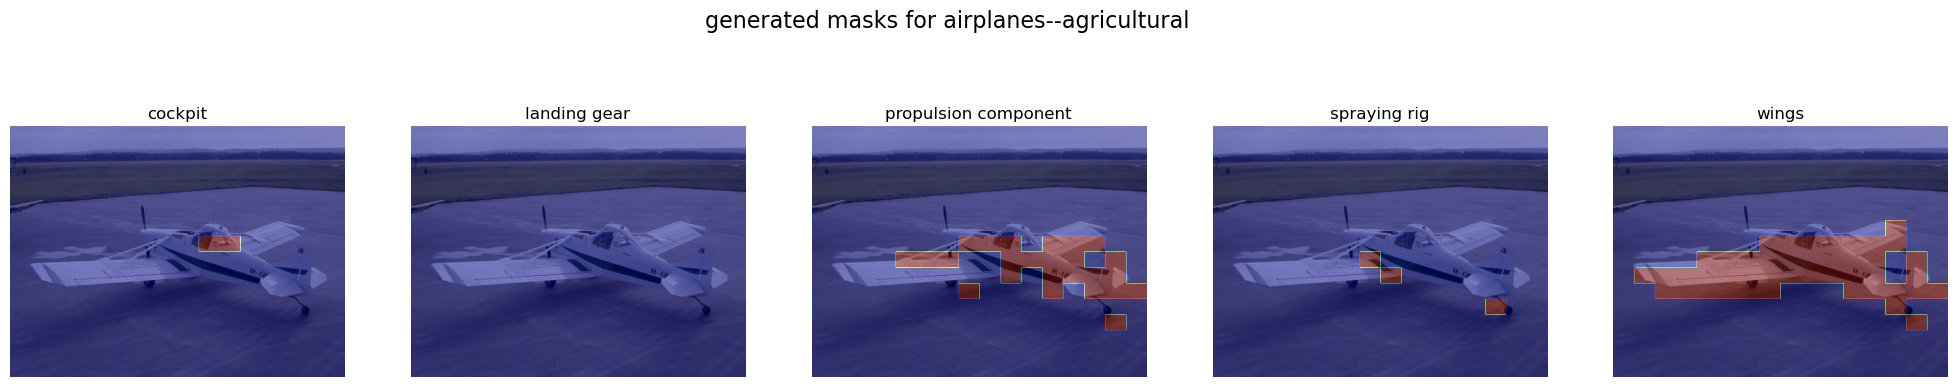

Image saved to output2/masks_kitchen--espresso machine-kitchen--espresso machine-1.jpg.png


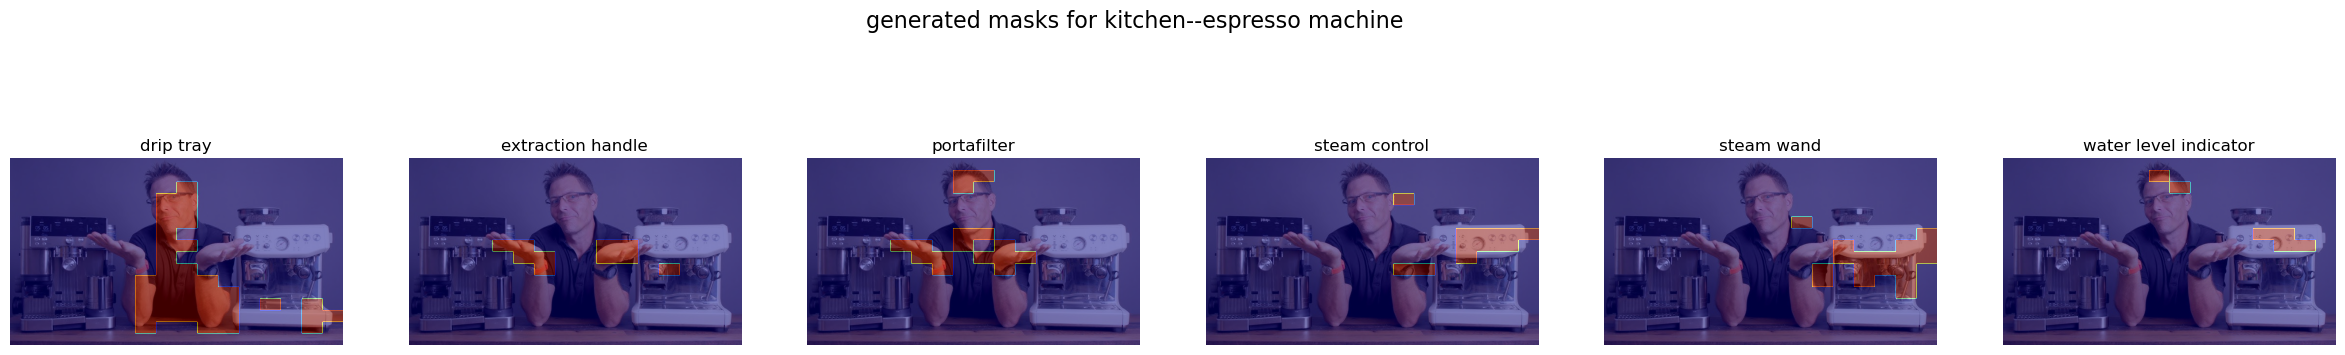

Image saved to output2/masks_airplanes--attack-airplanes--attack-2.jpg.png


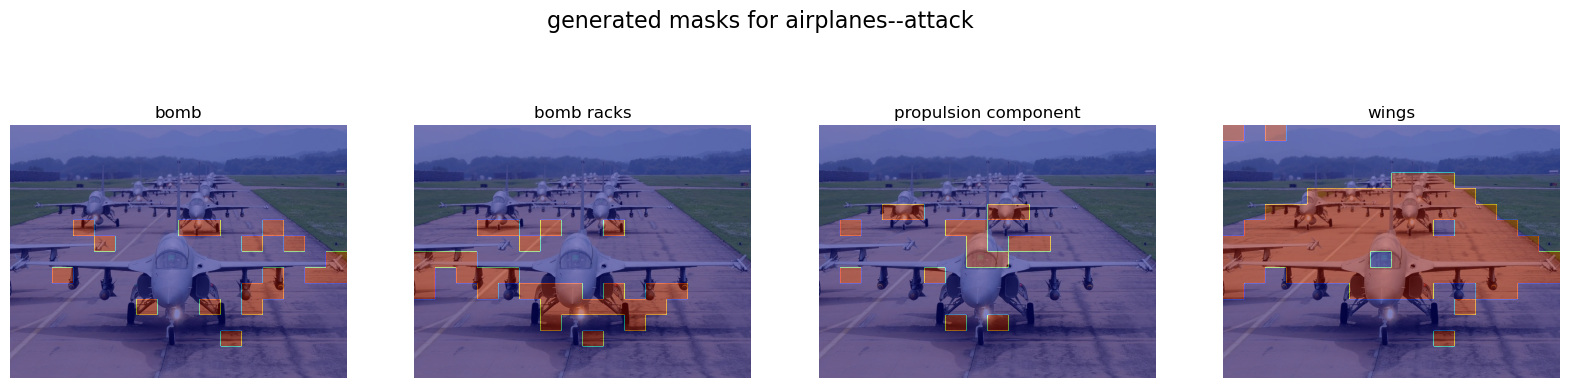

Image saved to output2/masks_airplanes--agricultural-airplanes--agricultural-2.jpg.png


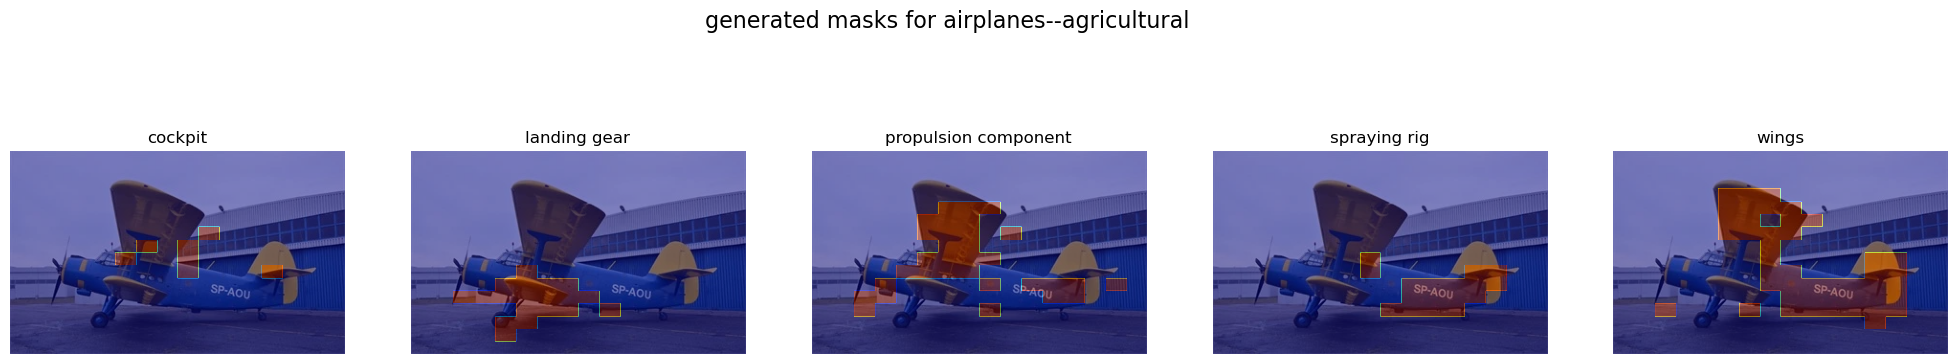

In [1]:
import main_pipeline
main_pipeline.main()

# Steps to classify test images

##### build dino model

In [4]:
from config import DEFAULT_DINO_MODEL
import torch
def build_dino(model_name: str = DEFAULT_DINO_MODEL):
    device = "cuda" if torch.cuda.is_available() else "cpu"
    return torch.hub.load("facebookresearch/dinov2", model_name).to(device)

dino_encoder = build_dino()
dino_encoder.eval()
print("DINO model loaded successfully!")

Using cache found in /home/elenc2/.cache/torch/hub/facebookresearch_dinov2_main


DINO model loaded successfully!


##### load_and_preprocess_images for testing

In [5]:
from data_processing import load_and_preprocess_images
import torch

test_image_dir = "/shared/nas/data/m1/elenc2/PartClassification/test_images"
images_data = load_and_preprocess_images(test_image_dir, dino_encoder)

##### Load the concept hierarchy

In [6]:
from data_processing import load_concept_hierarchy
# Example usage
concept_hierarchy = load_concept_hierarchy()
if concept_hierarchy is not None:
    all_root_concepts = list(concept_hierarchy.keys())

#####  Load part classifiers for all root concepts


In [7]:
from data_processing import load_part_classifiers
part_classifiers_l1 = load_part_classifiers(all_root_concepts)
print(f"Loaded {len(part_classifiers_l1)} part classifiers with l1 penalty")
part_classifiers_l2 = load_part_classifiers(all_root_concepts, penalty='l2')
print(f"Loaded {len(part_classifiers_l2)} part classifiers with l2 penalty")

Loaded 352 part classifiers with l1 penalty
Loaded 352 part classifiers with l2 penalty


#### Classify Parts

Image saved to output2/masks_airplanes--attack-airplanes--attack-1.jpg.png


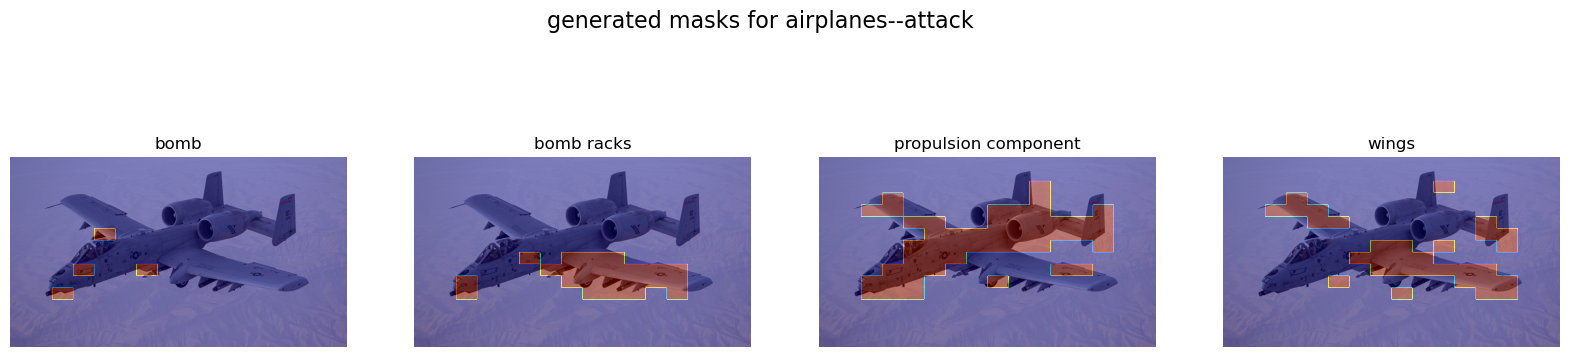

Image saved to output2/masks_kitchen--air fryer-kitchen--air fryer-1.jpg.png


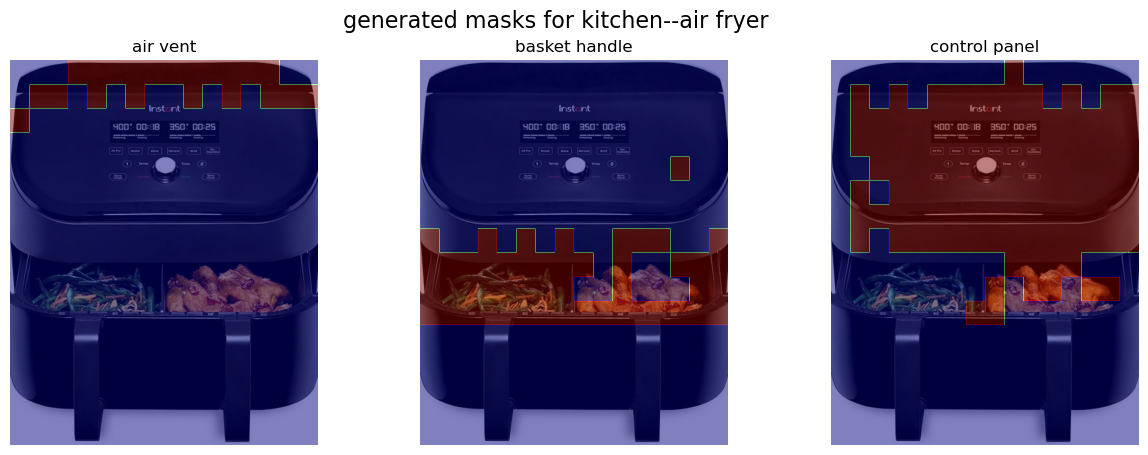

Image saved to output2/masks_kitchen--bottle opener-kitchen--bottle opener-1.jpg.png


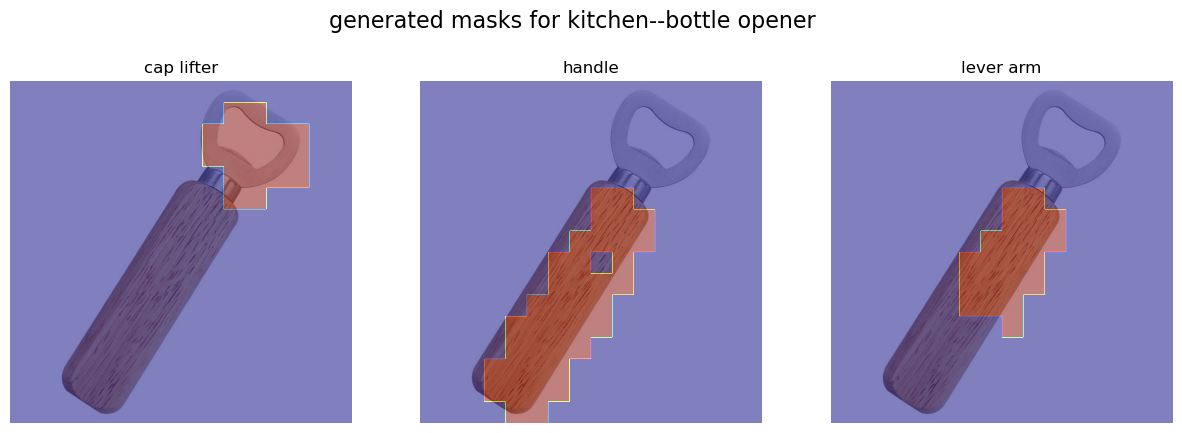

Image saved to output2/masks_kitchen--espresso machine-kitchen--espresso machine-2.jpg.png


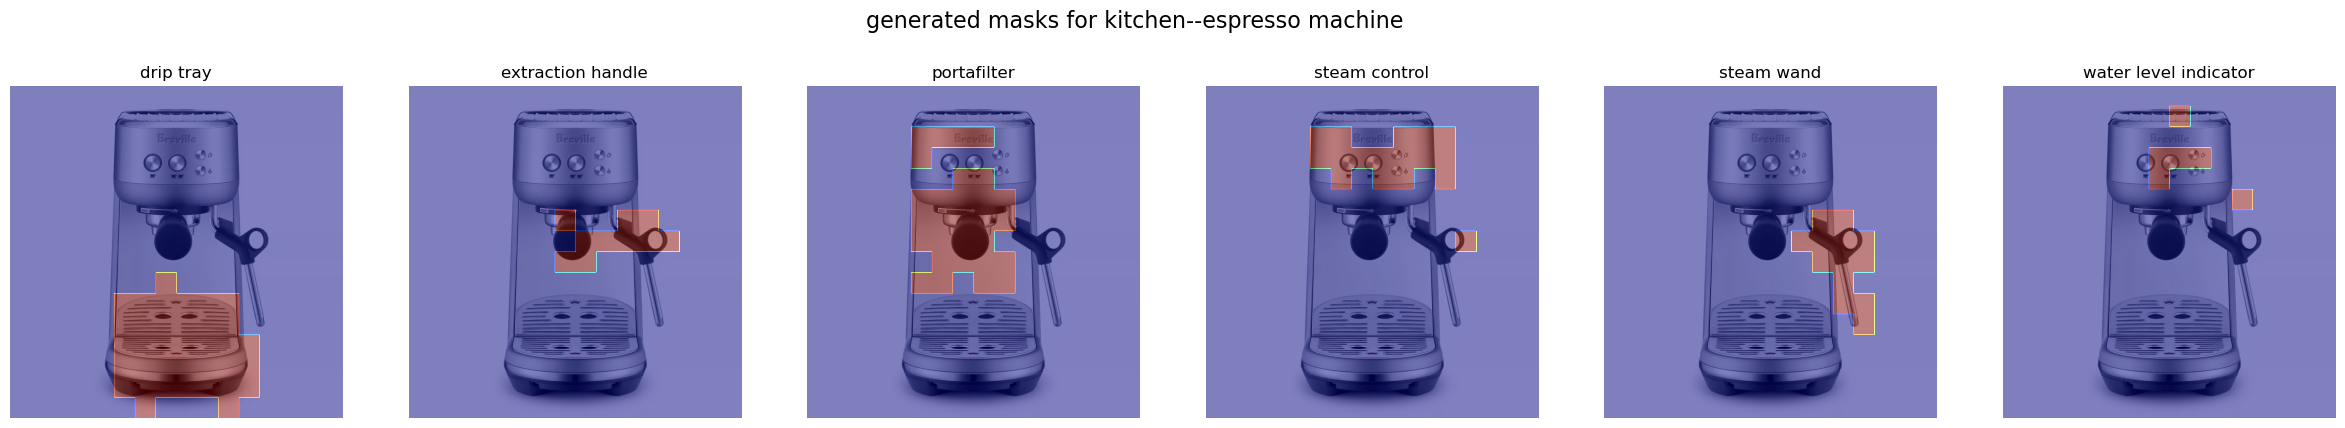

Image saved to output2/masks_vehicles--hatch back-vehicles--hatch back-2.jpg.png


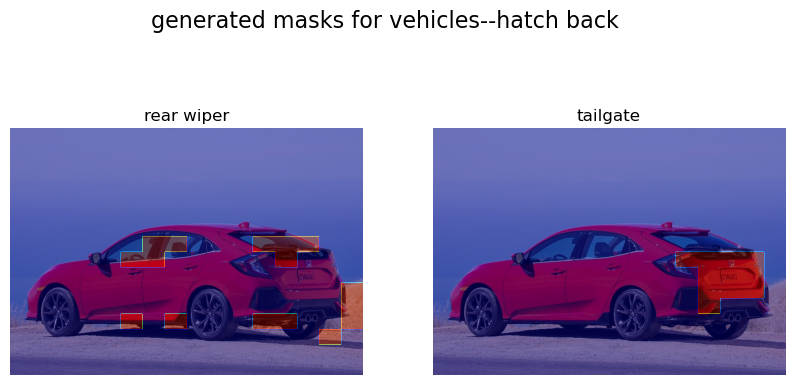

Image saved to output2/masks_kitchen--pizza cutter-kitchen--pizza cutter-1.jpg.png


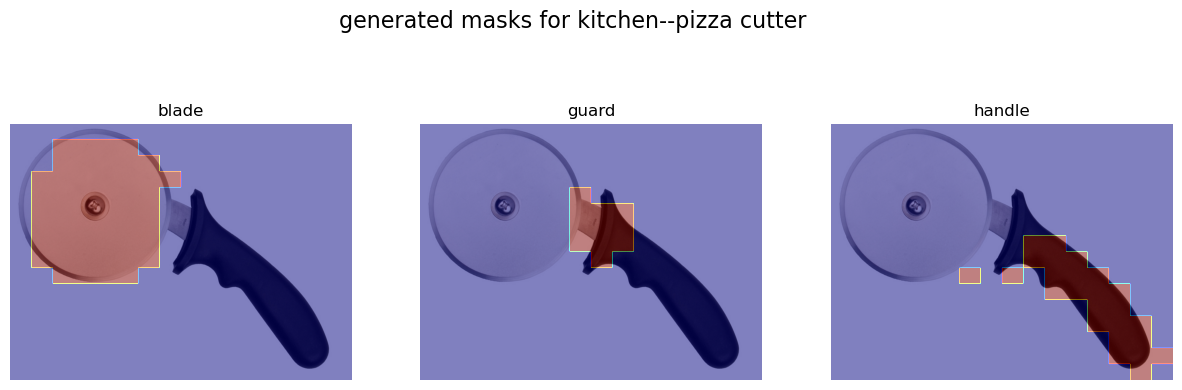

Image saved to output2/masks_vehicles--hatch back-vehicles--hatch back-1.jpg.png


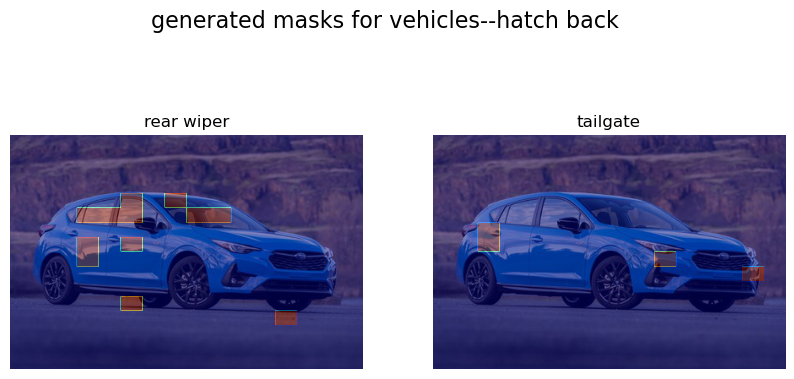

Image saved to output2/masks_airplanes--agricultural-airplanes--agricultural-1.png.png


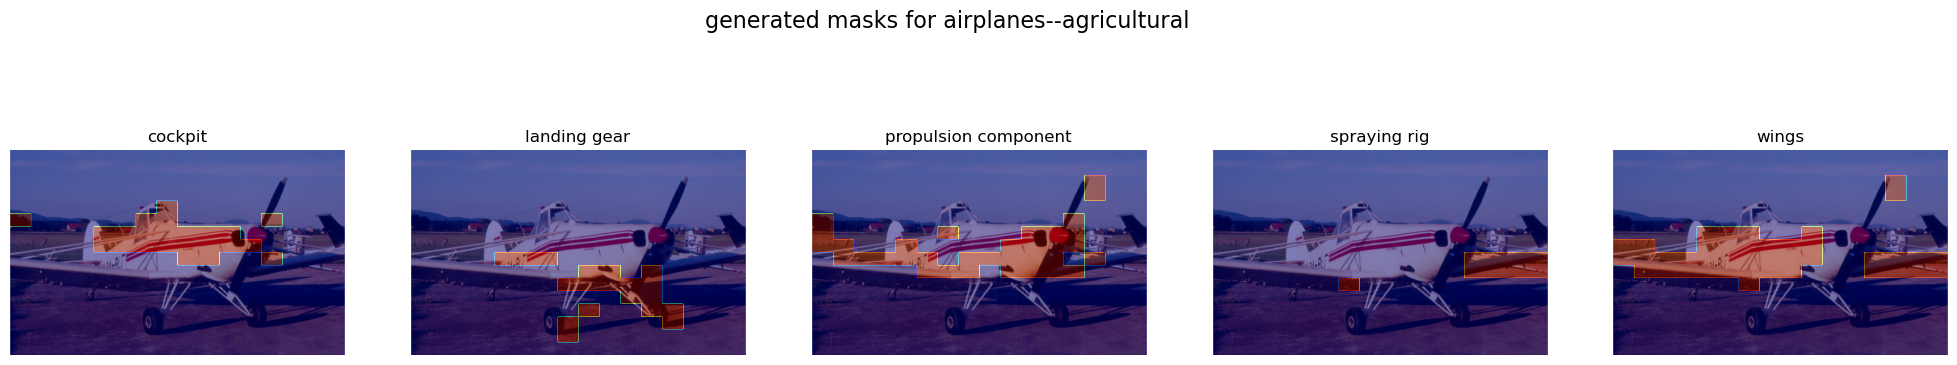

Image saved to output2/masks_kitchen--espresso machine-kitchen--espresso machine-3.png.png


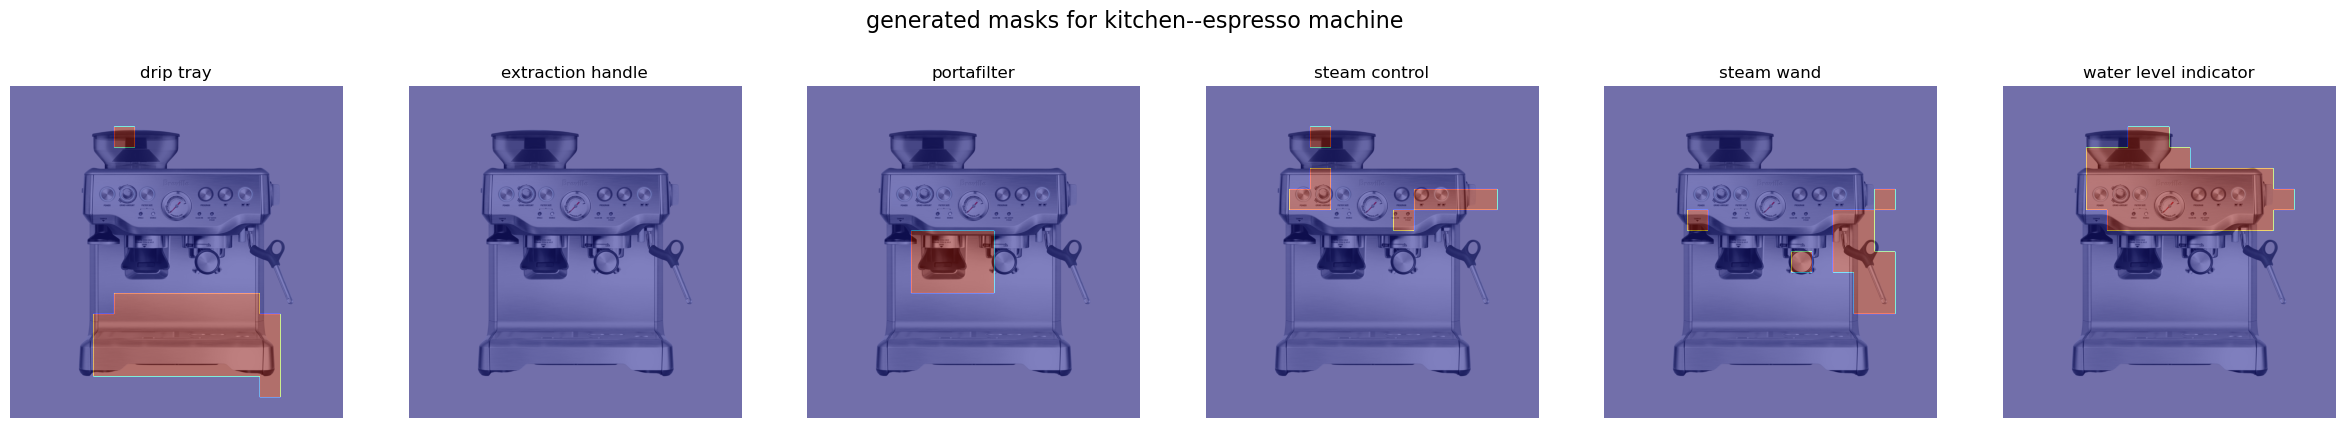

Image saved to output2/masks_kitchen--air fryer-kitchen--air fryer-2.jpg.png


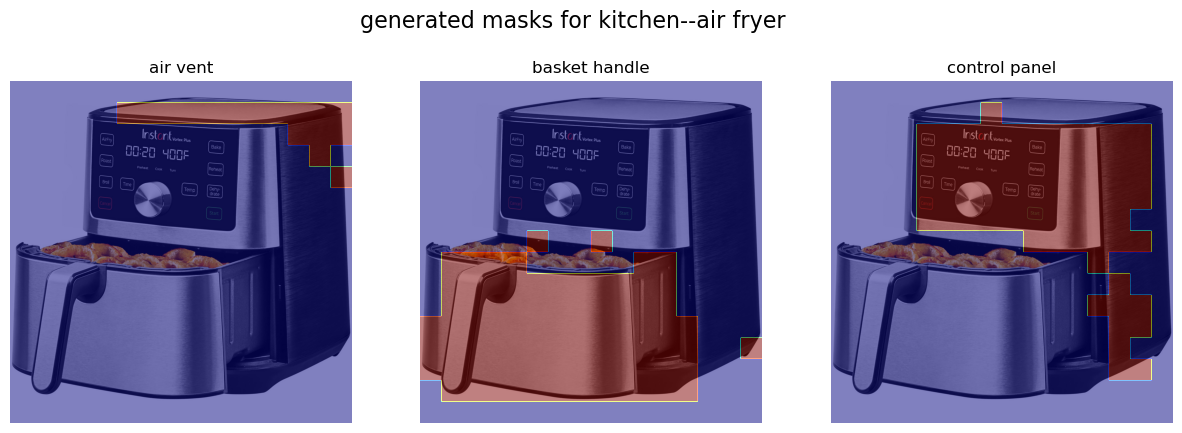

Image saved to output2/masks_airplanes--agricultural-airplanes--agricultural-3.jpg.png


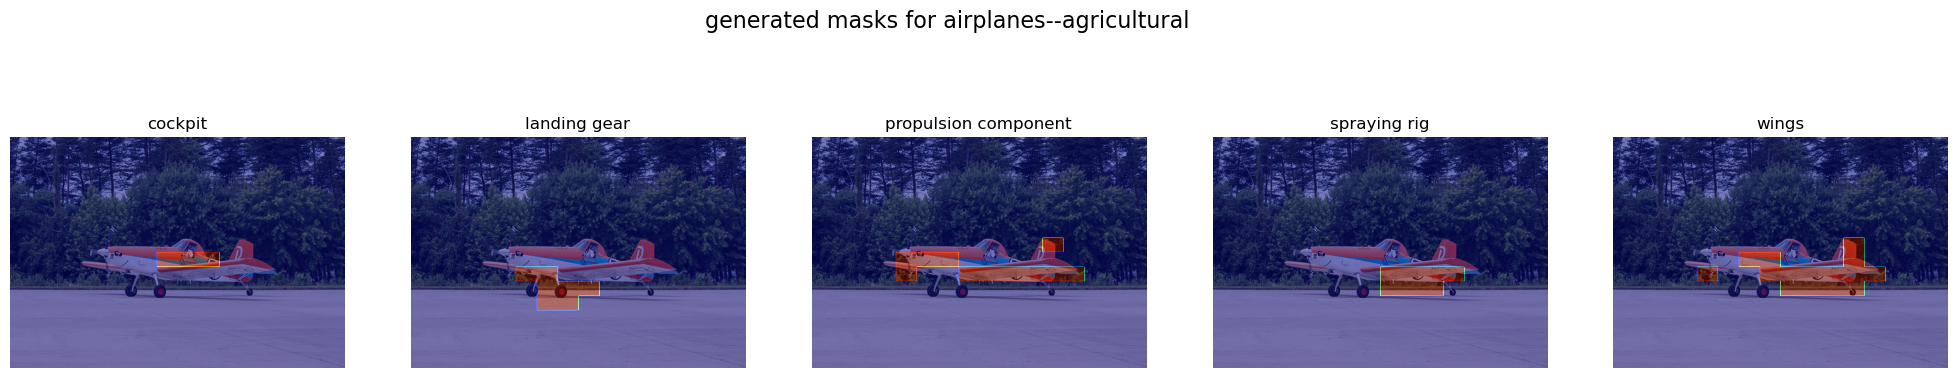

Image saved to output2/masks_airplanes--agricultural-airplanes--agricultural-4.jpg.png


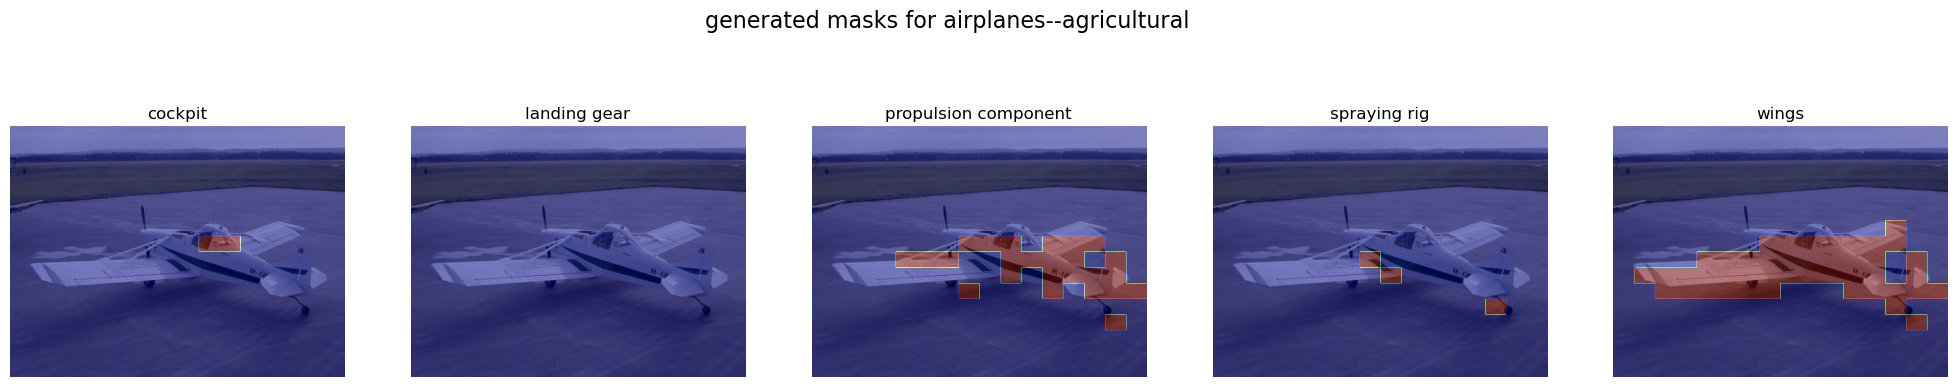

Image saved to output2/masks_kitchen--espresso machine-kitchen--espresso machine-1.jpg.png


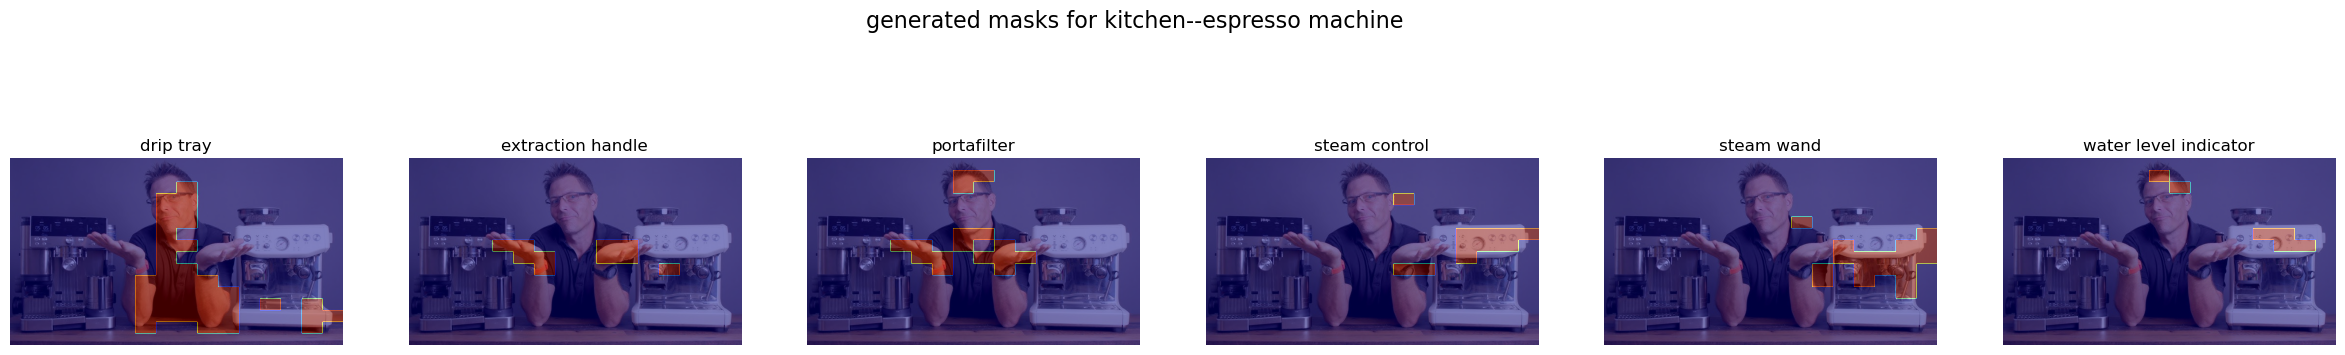

Image saved to output2/masks_airplanes--attack-airplanes--attack-2.jpg.png


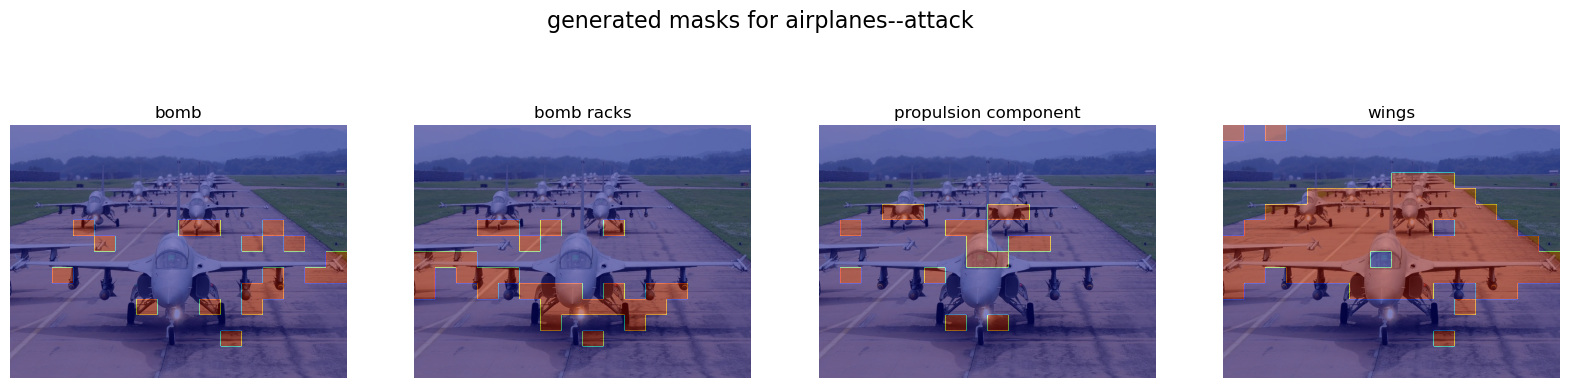

Image saved to output2/masks_airplanes--agricultural-airplanes--agricultural-2.jpg.png


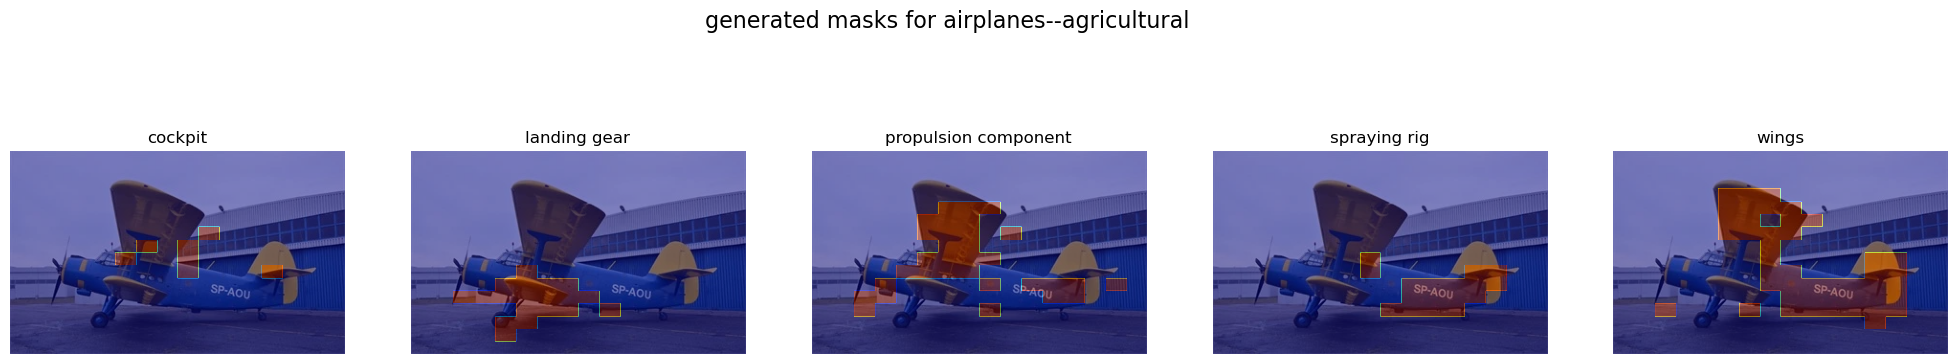

In [9]:
from classification import classify_parts
from visualization import visualize_masks_on_image

thresh = 0.95
for img_name, image_data in images_data.items():
    root_concept = image_data["concept"]
    image_path = image_data["image_path"]
    concept_parts = concept_hierarchy[root_concept]

    predicted_masks_l2 = classify_parts(image_data, concept_parts, part_classifiers_l2, probability_threshold=thresh, upsample=True)
    path_to_save = f"output2/masks_{root_concept}-{img_name}.png"
    visualize_masks_on_image(image_path, predicted_masks_l2, f"generated masks for {root_concept}", only_save=False, save_path=path_to_save)
